In [1]:
# Some configurations to "beautify" plots
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "Libre Franklin"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

# "What went wrong?" data acquisition edition
You have your hypotheses.
You've planned your study design.
It's time to acquire your data.

But first, it's important to develop a *standard operating procedure* for your acquisition.
This will not only make sure that you run things consistently, but also it will minimise experimenter effects 
in your experiments by having agreed upon, well-defined criteria for the success of your acquisition.

Such criteria could include the quality metrics generated by `MRIQC`, which are objective measurements
that can be used for defining quality cut offs.

Let's go through some examples where the images acquired have not met such criteria.

## Example 1
Let's start off with an easy one: below is a T2-weighted structural image.

In [2]:
import nanslice.jupyter as ns
%matplotlib widget

# ns.three_plane('./assets/example-1_desc-orig_acq.nii.gz', interactive=True, cmap='gray')

```{admonition} What do you think the problem was?
:class: dropdown
A badly positioned coil!

*To correct for this*, make sure that the brain is located in the isocentre of the scanner, 
and that the head coil is positioned equally over the brain.
```

In [3]:
# ns.three_plane('./assets/example-1_desc-corr_acq.nii.gz', interactive=True, cmap='gray')

## Example 2
Here is a subject whose 4D BOLD images from a single session have been assessed with `MRIQC`:

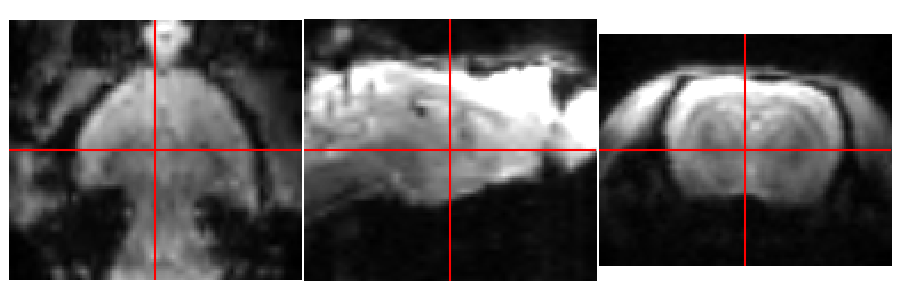

In [4]:
ns.three_plane('assets/example-2_run-01_acq.nii.gz', interactive=True, cmap='gray')

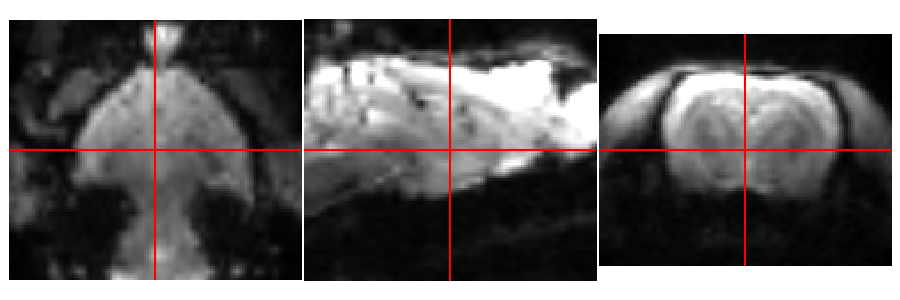

In [5]:
ns.three_plane('assets/example-2_run-02_acq.nii.gz', interactive=True, cmap='gray')

The `MRIQC` reports for [run 1](./assets/example-2_run-01_acq.html) and [run 2](./assets/example-2_run-02_acq.html) are also available.

Which run is better? Can you spot the problem?
```{hint}
:class: dropdown
Try comparing the *carpet plots*, generated by `MRIQC`, which facilitate viewing patterns across all voxels over time.
run 1:
![run 1](./assets/example-2_run-01_desc-fmriplot_acq.svg)

run 2:
![run 2](./assets/example-2_run-02_desc-fmriplot_acq.svg)
```

```{admonition} What do you think the problem was?
:class: dropdown
The animal moved in the last part of the scan, removing their head entirely from the cradle and head coil.

Interestingly, this is not obvious in the mean image, which is justification to check the whole time course and not just some volumes!
```

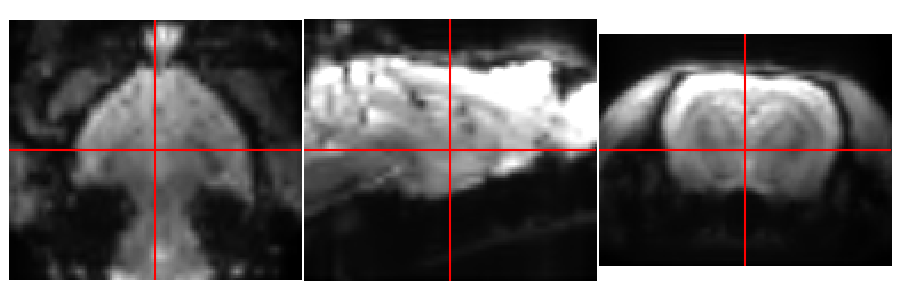

In [6]:
ns.three_plane('./assets/example-2_run-02_desc-tmean_acq.nii.gz', interactive=True, cmap='gray')

## Example 3
Below is the first attempt at a structural image of a subject

In [7]:
# ns.three_plane('./assets/example-3_desc-orig_acq.nii.gz', interactive=True, cmap='gray')

Next, let's look at the structural image, *with the same scan parameters*, that was used for processing:

In [8]:
# ns.three_plane('assets/example-3_desc-orig_acq.nii.gz', interactive=True, cmap='gray')

```{admonition} What is the difference between the two images??
:class: dropdown
**Wrong coil configuration!**
The first image did not have the correct coil configuration.
In particular, the head coil was not set as the receiver coil.
```

## Example 4
Here are three multiparametric mapping images from a single subject acquired with the same protocol in three separate scanning sessions.

Session 1:

In [9]:
# ns.three_plane('assets/example-4_ses-1_acq.nii.gz', interactive=True, cmap='gray')

Session 2:

In [10]:
# ns.three_plane('assets/example-4_ses-2_acq.nii.gz', interactive=True, cmap='gray')

Session 3:

In [11]:
# ns.three_plane('assets/example-4_ses-3_acq.nii.gz', interactive=True, cmap='gray')

```{admonition} Which image has the worst quality? What do you think the problem was?
:class: dropdown
Changing air temperature!

The set up to maintain the mouse's body temperature in the first session used a fan blowing thermostatically-controlled air into the scanner bore.
In the second and third sessions, this was corrected by using a water-heater set up.
```

## Example 5
Finally, we have this example of an EPI dataset.

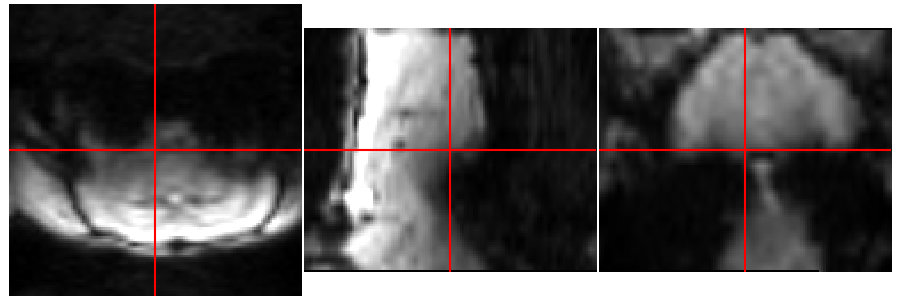

In [12]:
ns.three_plane('assets/example-5_acq.nii.gz', interactive=True, cmap='gray')

```{admonition} What do you think the problem was?
:class: dropdown
This is a ghosting artifact caused by the scan protocol.

This particular protocol was acquiring too many slices in too short a window.
If you are testing a new scan protocol, always have an optimised version before you start acquiring the data for a study.

A walk-through acquisition the day before the study starts is highly recommended if it can be budgeted for (in time and money).
```